In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.colors as mcolors

## ARTICLE FIGURE 7
## Code to compare RE PRODUCTS

In [2]:
obs_base = os.path.join('/','media','arturo','T9','Data','Italy', 'stations', 'Italy_raingauges', 'QC_MIX')

In [3]:
lon_min, lon_max, lat_min, lat_max, area, toll = 6.5, 19, 36.5, 48, 'ITALY', 0.002

Tr = [5.,  10.,  20.,  50., 100., 200.]

In [4]:
veneto_dir = os.path.join('/','media','arturo','T9','Data','shapes','Europa','Italy')

if os.path.exists(veneto_dir):
    REGIONS = gpd.read_file(os.path.join(veneto_dir,'Italy_regions.geojson'))
    DEM = gpd.read_file(os.path.join(veneto_dir,'DEM','Italy_dem_800.geojson'))   
else:
    raise SystemExit(f"File not found: {veneto_dir}")

# update name of REGIONS geopandas
REGIONS = REGIONS.rename(columns={"reg_name": "Region"})
REGIONS['Region'] = REGIONS['Region'].replace('Emilia Romagna', 'Emilia-Romagna')

In [5]:
ISO_names = pd.read_csv(os.path.join('/','media','arturo','T9','Data','Italy', 'stations', 'Italy_raingauges', 'ISO_IT_REGION_EN.csv'))
REGIONS_merged = REGIONS.merge(ISO_names, on="Region")
dict_keys = ISO_names['ISO'].values

In [6]:
def RSR_DF_RE(DF_DATA, DF_lat, DF_lon):
    RE_ALL, RE_ALL_NORM, LAT_ALL, LON_ALL = [], [], [], [], 
    for pos in range(len(dict_keys)):
        RE_tmp = DF_DATA[dict_keys[pos]].values
        RE_lat = DF_lat[dict_keys[pos]].values
        RE_lon = DF_lon[dict_keys[pos]].values
        
        RE_lat = RE_lat[~np.isnan(RE_tmp)]
        RE_lon = RE_lon[~np.isnan(RE_tmp)]
        RE_tmp = RE_tmp[~np.isnan(RE_tmp)]
        
        val_ = abs(RE_tmp)
        RE_norm = (val_ - np.min(val_))/(np.nanmax(val_) - np.min(val_))
        
        RE_ALL.extend(RE_tmp)
        RE_ALL_NORM.extend(RE_norm)
        LAT_ALL.extend(RE_lat)
        LON_ALL.extend(RE_lon)

    DF_ = pd.DataFrame({'LAT':LAT_ALL, 'LON':LON_ALL, 'RE_IMERG': RE_ALL, 'RE_IMERG_NORM': RE_ALL_NORM})

    return DF_

In [7]:
dir_in = os.path.join(obs_base, 'DATA_1dy', 'RE_ENSEMBLE_SAT', f'DOWN_ensemble_relative_error.csv')
ENSEMBLE_RE_D = pd.read_csv(dir_in)

dir_in = os.path.join(obs_base, 'DATA_1dy', 'RE_ENSEMBLE_SAT', f'SAT_ensemble_relative_error.csv')
ENSEMBLE_RE_S = pd.read_csv(dir_in)

dir_in = os.path.join(obs_base, 'DATA_1dy', 'RE_ENSEMBLE_SAT', f'OBS_relative_error_lat.csv')
ENSEMBLE_RE_LAT = pd.read_csv(dir_in)

dir_in = os.path.join(obs_base, 'DATA_1dy', 'RE_ENSEMBLE_SAT', f'OBS_relative_error_lon.csv')
ENSEMBLE_RE_LON = pd.read_csv(dir_in)

FileNotFoundError: [Errno 2] No such file or directory: '/media/arturo/T9/Data/Italy/stations/Italy_raingauges/QC_MIX/DATA_1dy/RE_ENSEMBLE_SAT/DOWN_ensemble_relative_error.csv'

In [ ]:
DF_ENSEMBLE_D = RSR_DF_RE(ENSEMBLE_RE_D, ENSEMBLE_RE_LAT, ENSEMBLE_RE_LON)
DF_ENSEMBLE_S = RSR_DF_RE(ENSEMBLE_RE_S, ENSEMBLE_RE_LAT, ENSEMBLE_RE_LON)

In [ ]:
dir_in = os.path.join(obs_base, 'DATA_1dy', 'RE_ENSEMBLE_SAT', f'DOWN_IMERG_relative_error.csv')
IMERG_RE_D = pd.read_csv(dir_in)

dir_in = os.path.join(obs_base, 'DATA_1dy', 'RE_ENSEMBLE_SAT', f'SAT_IMERG_relative_error.csv')
IMERG_RE_S = pd.read_csv(dir_in)

dir_in = os.path.join(obs_base, 'DATA_1dy', 'RE_ENSEMBLE_SAT', f'DOWN_IMERG_OBS_relative_error_lat.csv')
IMERG_RE_LAT = pd.read_csv(dir_in)

dir_in = os.path.join(obs_base, 'DATA_1dy', 'RE_ENSEMBLE_SAT', f'DOWN_IMERG_OBS_relative_error_lon.csv')
IMERG_RE_LON = pd.read_csv(dir_in)

DF_IMERG_D = RSR_DF_RE(IMERG_RE_D, IMERG_RE_LAT, IMERG_RE_LON)

In [ ]:
dir_in = os.path.join(obs_base, 'DATA_1dy', 'RE_ENSEMBLE_SAT', f'DOWN_ERA5_relative_error.csv')
ERA5_RE = pd.read_csv(dir_in)

dir_in = os.path.join(obs_base, 'DATA_1dy', 'RE_ENSEMBLE_SAT', f'DOWN_ERA5_OBS_relative_error_lat.csv')
ERA5_RE_LAT = pd.read_csv(dir_in)

dir_in = os.path.join(obs_base, 'DATA_1dy', 'RE_ENSEMBLE_SAT', f'DOWN_ERA5_OBS_relative_error_lon.csv')
ERA5_RE_LON = pd.read_csv(dir_in)

In [ ]:
RE_ERA5_ALL, RE_ERA5_ALL_NORM, LAT_ERA5_ALL, LON_ERA5_ALL = [], [], [], []
for pos in range(len(dict_keys)):
    RE_ERA5_tmp = ERA5_RE[dict_keys[pos]].values
    RE_ERA5_lat = ERA5_RE_LAT[dict_keys[pos]].values
    RE_ERA5_lon = ERA5_RE_LON[dict_keys[pos]].values

    RE_ERA5_lat = RE_ERA5_lat[~np.isnan(RE_ERA5_tmp)]
    RE_ERA5_lon = RE_ERA5_lon[~np.isnan(RE_ERA5_tmp)]
    RE_ERA5_tmp = RE_ERA5_tmp[~np.isnan(RE_ERA5_tmp)]

    val_ERA5 = abs(RE_ERA5_tmp)
    val_ERA5_norm = (val_ERA5 - np.min(val_ERA5))/(np.nanmax(val_ERA5) - np.min(val_ERA5))
    
    RE_ERA5_ALL.extend(RE_ERA5_tmp)
    RE_ERA5_ALL_NORM.extend(val_ERA5_norm)
    LAT_ERA5_ALL.extend(RE_ERA5_lat)
    LON_ERA5_ALL.extend(RE_ERA5_lon)

In [ ]:
dir_in = os.path.join(obs_base, 'DATA_1dy', 'RE_ENSEMBLE_SAT', f'DOWN_MSWEP_relative_error.csv')
MSWEP_RE = pd.read_csv(dir_in)

dir_in = os.path.join(obs_base, 'DATA_1dy', 'RE_ENSEMBLE_SAT', f'DOWN_MSWEP_OBS_relative_error_lat.csv')
MSWEP_RE_LAT = pd.read_csv(dir_in)

dir_in = os.path.join(obs_base, 'DATA_1dy', 'RE_ENSEMBLE_SAT', f'DOWN_MSWEP_OBS_relative_error_lon.csv')
MSWEP_RE_LON = pd.read_csv(dir_in)

In [ ]:
RE_MSWEP_ALL, RE_MSWEP_ALL_NORM, LAT_MSWEP_ALL, LON_MSWEP_ALL = [], [], [], []
for pos in range(len(dict_keys)):
    RE_MSWEP_tmp = MSWEP_RE[dict_keys[pos]].values
    RE_MSWEP_lat = MSWEP_RE_LAT[dict_keys[pos]].values
    RE_MSWEP_lon = MSWEP_RE_LON[dict_keys[pos]].values

    RE_MSWEP_lat = RE_MSWEP_lat[~np.isnan(RE_MSWEP_tmp)]
    RE_MSWEP_lon = RE_MSWEP_lon[~np.isnan(RE_MSWEP_tmp)]
    RE_MSWEP_tmp = RE_MSWEP_tmp[~np.isnan(RE_MSWEP_tmp)]

    val_MSWEP = abs(RE_MSWEP_tmp)
    val_MSWEP_norm = (val_MSWEP - np.min(val_MSWEP))/(np.nanmax(val_MSWEP) - np.min(val_MSWEP))
    
    RE_MSWEP_ALL.extend(RE_MSWEP_tmp)
    RE_MSWEP_ALL_NORM.extend(val_MSWEP_norm)
    LAT_MSWEP_ALL.extend(RE_MSWEP_lat)
    LON_MSWEP_ALL.extend(RE_MSWEP_lon)

In [ ]:
dir_in = os.path.join(obs_base, 'DATA_1dy', 'RE_ENSEMBLE_SAT', f'DOWN_CMORPH_relative_error.csv')
CMORPH_RE = pd.read_csv(dir_in)

dir_in = os.path.join(obs_base, 'DATA_1dy', 'RE_ENSEMBLE_SAT', f'DOWN_CMORPH_OBS_relative_error_lat.csv')
CMORPH_RE_LAT = pd.read_csv(dir_in)

dir_in = os.path.join(obs_base, 'DATA_1dy', 'RE_ENSEMBLE_SAT', f'DOWN_CMORPH_OBS_relative_error_lon.csv')
CMORPH_RE_LON = pd.read_csv(dir_in)

In [ ]:
RE_CMORPH_ALL, RE_CMORPH_ALL_NORM, LAT_CMORPH_ALL, LON_CMORPH_ALL = [], [], [], []
for pos in range(len(dict_keys)):
    RE_CMORPH_tmp = CMORPH_RE[dict_keys[pos]].values
    RE_CMORPH_lat = CMORPH_RE_LAT[dict_keys[pos]].values
    RE_CMORPH_lon = CMORPH_RE_LON[dict_keys[pos]].values

    RE_CMORPH_lat = RE_CMORPH_lat[~np.isnan(RE_CMORPH_tmp)]
    RE_CMORPH_lon = RE_CMORPH_lon[~np.isnan(RE_CMORPH_tmp)]
    RE_CMORPH_tmp = RE_CMORPH_tmp[~np.isnan(RE_CMORPH_tmp)]

    val_CMORPH = abs(RE_CMORPH_tmp)
    val_CMORPH_norm = (val_CMORPH - np.min(val_CMORPH))/(np.nanmax(val_CMORPH) - np.min(val_CMORPH))
    
    RE_CMORPH_ALL.extend(RE_CMORPH_tmp)
    RE_CMORPH_ALL_NORM.extend(val_CMORPH_norm)
    LAT_CMORPH_ALL.extend(RE_CMORPH_lat)
    LON_CMORPH_ALL.extend(RE_CMORPH_lon)

In [ ]:
dir_in = os.path.join(obs_base, 'DATA_1dy', 'RE_ENSEMBLE_SAT', f'DOWN_GSMaP_relative_error.csv')
GSMaP_RE = pd.read_csv(dir_in)

dir_in = os.path.join(obs_base, 'DATA_1dy', 'RE_ENSEMBLE_SAT', f'DOWN_GSMaP_OBS_relative_error_lat.csv')
GSMaP_RE_LAT = pd.read_csv(dir_in)

dir_in = os.path.join(obs_base, 'DATA_1dy', 'RE_ENSEMBLE_SAT', f'DOWN_GSMaP_OBS_relative_error_lon.csv')
GSMaP_RE_LON = pd.read_csv(dir_in)

In [ ]:
RE_GSMaP_ALL, RE_GSMaP_ALL_NORM, LAT_GSMaP_ALL, LON_GSMaP_ALL = [], [], [], []
for pos in range(len(dict_keys)):
    RE_GSMaP_tmp = GSMaP_RE[dict_keys[pos]].values
    RE_GSMaP_lat = GSMaP_RE_LAT[dict_keys[pos]].values
    RE_GSMaP_lon = GSMaP_RE_LON[dict_keys[pos]].values

    RE_GSMaP_lat = RE_GSMaP_lat[~np.isnan(RE_GSMaP_tmp)]
    RE_GSMaP_lon = RE_GSMaP_lon[~np.isnan(RE_GSMaP_tmp)]
    RE_GSMaP_tmp = RE_GSMaP_tmp[~np.isnan(RE_GSMaP_tmp)]

    val_GSMaP = abs(RE_GSMaP_tmp)
    val_GSMaP_norm = (val_GSMaP - np.min(val_GSMaP))/(np.nanmax(val_GSMaP) - np.min(val_GSMaP))
    
    RE_GSMaP_ALL.extend(RE_GSMaP_tmp)
    RE_GSMaP_ALL_NORM.extend(val_GSMaP_norm)
    LAT_GSMaP_ALL.extend(RE_GSMaP_lat)
    LON_GSMaP_ALL.extend(RE_GSMaP_lon)

In [ ]:
dir_in = os.path.join(obs_base, 'DATA_1dy', 'RE_ENSEMBLE_SAT', f'DOWN_CHIRPS_relative_error.csv')
CHIRPS_RE = pd.read_csv(dir_in)

dir_in = os.path.join(obs_base, 'DATA_1dy', 'RE_ENSEMBLE_SAT', f'DOWN_CHIRPS_OBS_relative_error_lat.csv')
CHIRPS_RE_LAT = pd.read_csv(dir_in)

dir_in = os.path.join(obs_base, 'DATA_1dy', 'RE_ENSEMBLE_SAT', f'DOWN_CHIRPS_OBS_relative_error_lon.csv')
CHIRPS_RE_LON = pd.read_csv(dir_in)

In [ ]:
RE_CHIRPS_ALL, RE_CHIRPS_ALL_NORM, LAT_CHIRPS_ALL, LON_CHIRPS_ALL = [], [], [], []
for pos in range(len(dict_keys)):
    RE_CHIRPS_tmp = CHIRPS_RE[dict_keys[pos]].values
    RE_CHIRPS_lat = CHIRPS_RE_LAT[dict_keys[pos]].values
    RE_CHIRPS_lon = CHIRPS_RE_LON[dict_keys[pos]].values

    RE_CHIRPS_lat = RE_CHIRPS_lat[~np.isnan(RE_CHIRPS_tmp)]
    RE_CHIRPS_lon = RE_CHIRPS_lon[~np.isnan(RE_CHIRPS_tmp)]
    RE_CHIRPS_tmp = RE_CHIRPS_tmp[~np.isnan(RE_CHIRPS_tmp)]

    val_CHIRPS = abs(RE_CHIRPS_tmp)
    val_CHIRPS_norm = (val_CHIRPS - np.min(val_CHIRPS))/(np.nanmax(val_CHIRPS) - np.min(val_CHIRPS))
    
    RE_CHIRPS_ALL.extend(RE_CHIRPS_tmp)
    RE_CHIRPS_ALL_NORM.extend(val_CHIRPS_norm)
    LAT_CHIRPS_ALL.extend(RE_CHIRPS_lat)
    LON_CHIRPS_ALL.extend(RE_CHIRPS_lon)

In [ ]:
levels = np.arange(-1,1.1,0.1)
norm = mcolors.BoundaryNorm(boundaries=levels, ncolors=256)

/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


Export figure to: ../figures/Article_down/RE_ENSEMBLE_IMERG_ERA5.png


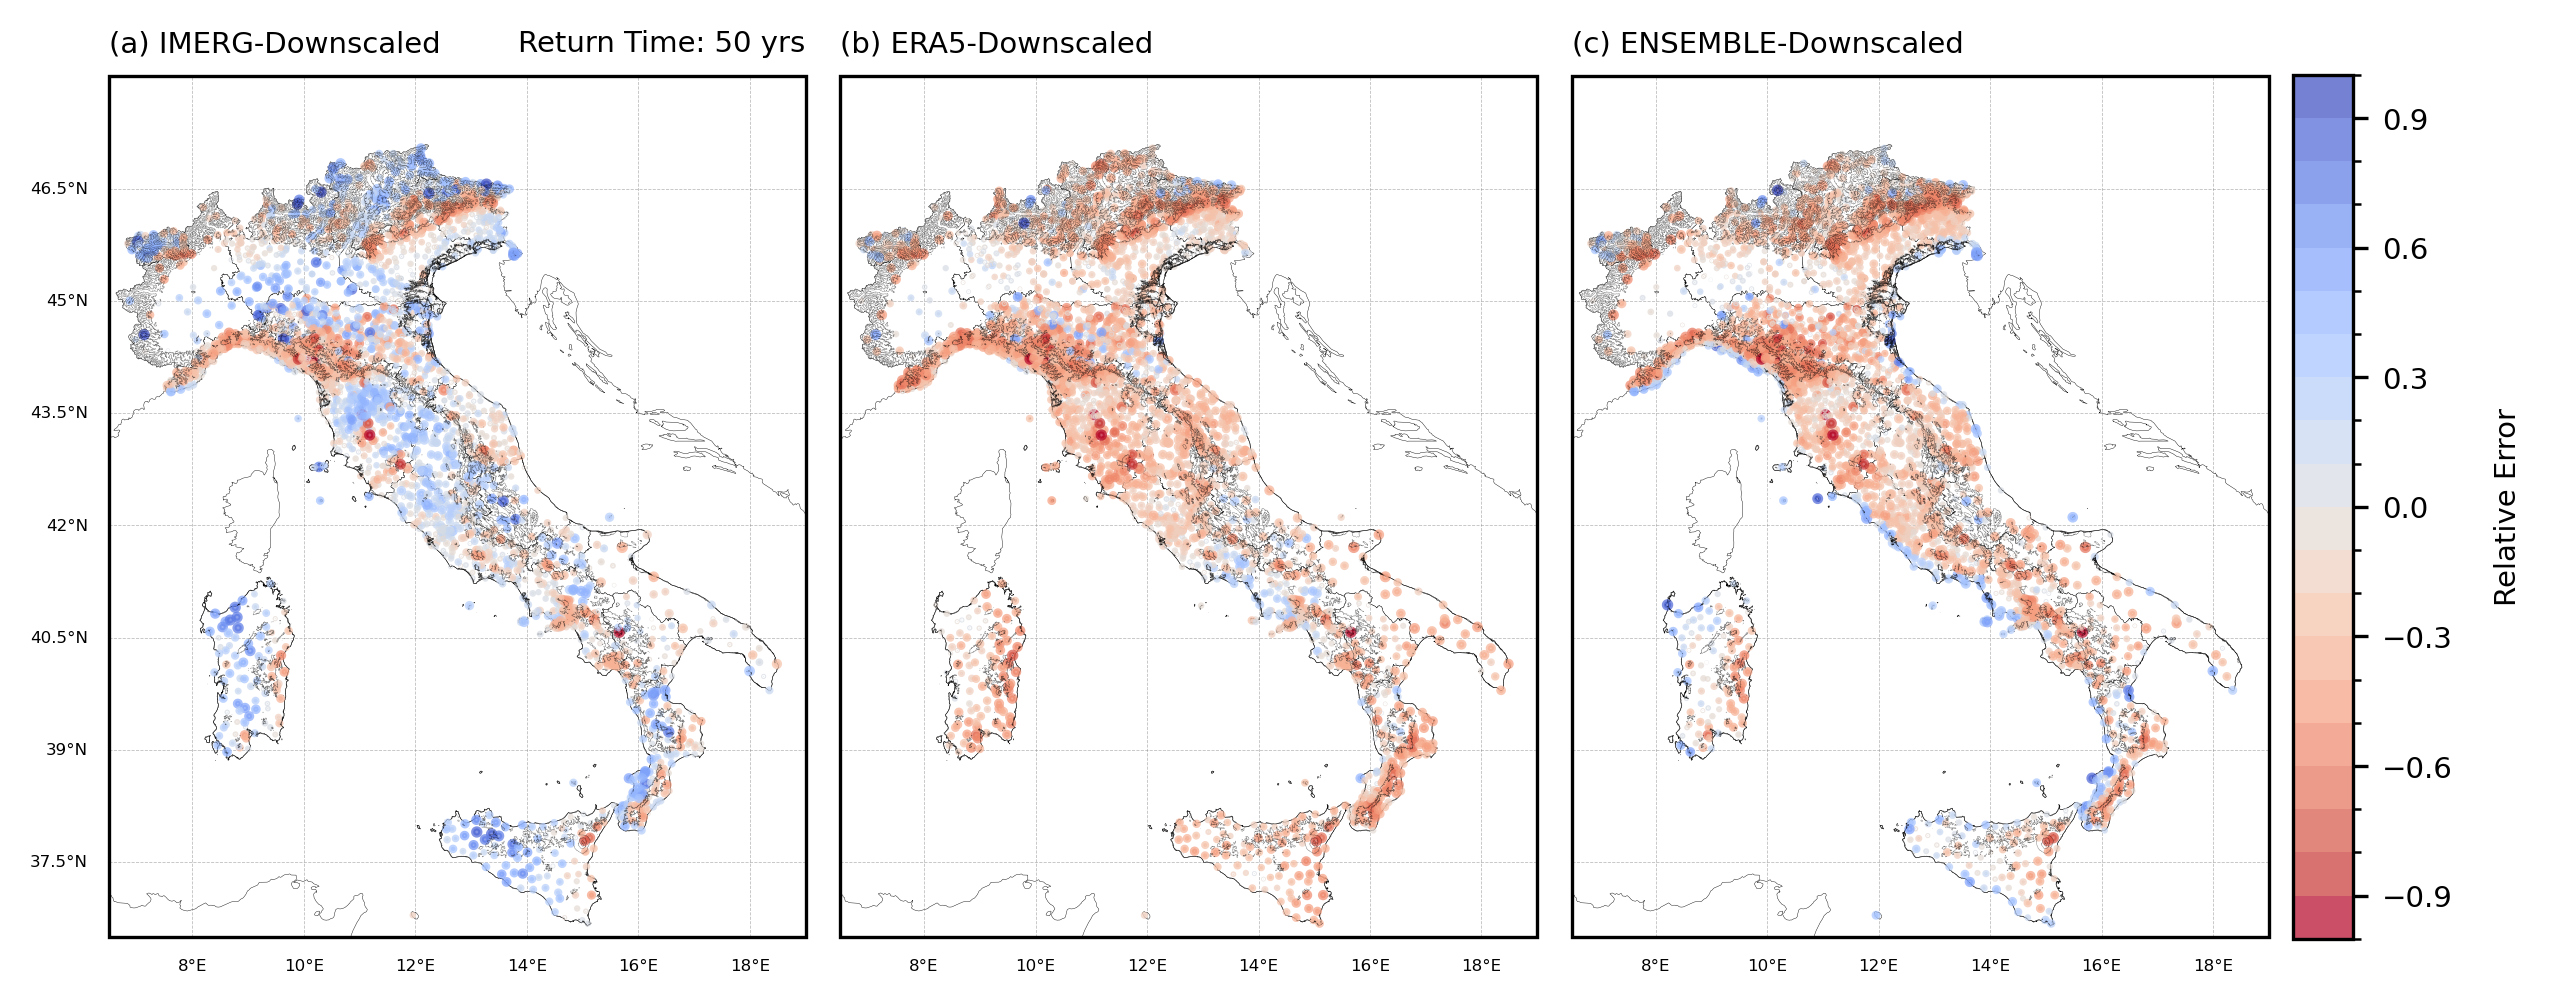

In [ ]:
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(8,4),dpi=300)
gs = gridspec.GridSpec(1,3)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.1,color='k')

im = REGIONS_merged.plot(legend=False, color='white', edgecolor="black", linewidth=0.1, ax=ax1)
DEM.plot(facecolor='None', edgecolor='k', ax=ax1, linewidth=0.1, zorder=21, alpha=0.5)
a1 = ax1.scatter(DF_IMERG_D['LON'], DF_IMERG_D['LAT'], c=DF_IMERG_D['RE_IMERG'], cmap='coolwarm_r', s=np.array(DF_IMERG_D['RE_IMERG_NORM'])*3, alpha=0.7, norm=norm, zorder=20)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels = True

gl.xlabel_style = {'size': 4, 'color': 'k'}
gl.ylabel_style = {'size': 4, 'color': 'k'}

# cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04)
# cbar.ax.tick_params(labelsize=6) 

ax1.set_title('(a) IMERG-Downscaled', fontsize=7, loc='left')
ax1.set_title('Return Time: 50 yrs', fontsize=7, loc='right')

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.1,color='k')

im = REGIONS_merged.plot(legend=False, color='white', edgecolor="black", linewidth=0.1, ax=ax1)
DEM.plot(facecolor='None', edgecolor='k', ax=ax1, linewidth=0.1, zorder=21, alpha=0.5)
a1 = ax1.scatter(LON_ERA5_ALL, LAT_ERA5_ALL, c=RE_ERA5_ALL, cmap='coolwarm_r', s=np.array(RE_ERA5_ALL_NORM)*3, alpha=0.7, norm=norm, zorder=20)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels =False

gl.xlabel_style = {'size': 4, 'color': 'k'}
gl.ylabel_style = {'size': 4, 'color': 'k'}

# cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04)
# cbar.ax.tick_params(labelsize=6) 

ax1.set_title('(b) ERA5-Downscaled', fontsize=7, loc='left')

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 2], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.1,color='k')

im = REGIONS_merged.plot(legend=False, color='white', edgecolor="black", linewidth=0.1, ax=ax1)
DEM.plot(facecolor='None', edgecolor='k', ax=ax1, linewidth=0.1, zorder=21, alpha=0.5)
a1 = ax1.scatter(DF_ENSEMBLE_D['LON'], DF_ENSEMBLE_D['LAT'], c=DF_ENSEMBLE_D['RE_IMERG'], cmap='coolwarm_r', s=np.array(DF_ENSEMBLE_D['RE_IMERG_NORM'])*3, alpha=0.7, norm=norm, zorder=20)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels =False

gl.xlabel_style = {'size': 4, 'color': 'k'}
gl.ylabel_style = {'size': 4, 'color': 'k'}

# cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04)
# cbar.ax.tick_params(labelsize=6) 

ax1.set_title('(c) ENSEMBLE-Downscaled', fontsize=7, loc='left')

# ============================================================================================================================
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.05, hspace=0.1)

cbar_ax = fig.add_axes([0.96, 0.14, 0.025, 0.72])#0.96
cbar = fig.colorbar(a1, cax=cbar_ax, orientation='vertical')
cbar.ax.tick_params(labelsize=7)
cbar.set_label("Relative Error", fontsize=7, labelpad=10)  

salida = os.path.join('..','figures','Article_down','RE_ENSEMBLE_IMERG_ERA5.png')
print(f'Export figure to: {salida}')
# plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.1, facecolor=None)

In [ ]:
RE_IMERG_ALL = np.array(RE_IMERG_ALL)
print(f'IMERG positive percent: {np.round(len(RE_IMERG_ALL[RE_IMERG_ALL>0])/len(RE_IMERG_ALL)*100,1)}')
print(f'IMERG negative percent: {np.round(len(RE_IMERG_ALL[RE_IMERG_ALL<0])/len(RE_IMERG_ALL)*100,1)}')

IMERG positive percent: 49.5
IMERG negative percent: 50.5


In [ ]:
RE_ERA5_ALL = np.array(RE_ERA5_ALL)
print(f'IMERG positive percent: {np.round(len(RE_ERA5_ALL[RE_ERA5_ALL>0])/len(RE_ERA5_ALL)*100,1)}')
print(f'IMERG negative percent: {np.round(len(RE_ERA5_ALL[RE_ERA5_ALL<0])/len(RE_ERA5_ALL)*100,1)}')

IMERG positive percent: 12.4
IMERG negative percent: 87.6


/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


Export figure to: ../figures/Article_down/RE_MSWEP_CMORPH_GSMaP_CHIRPS.png


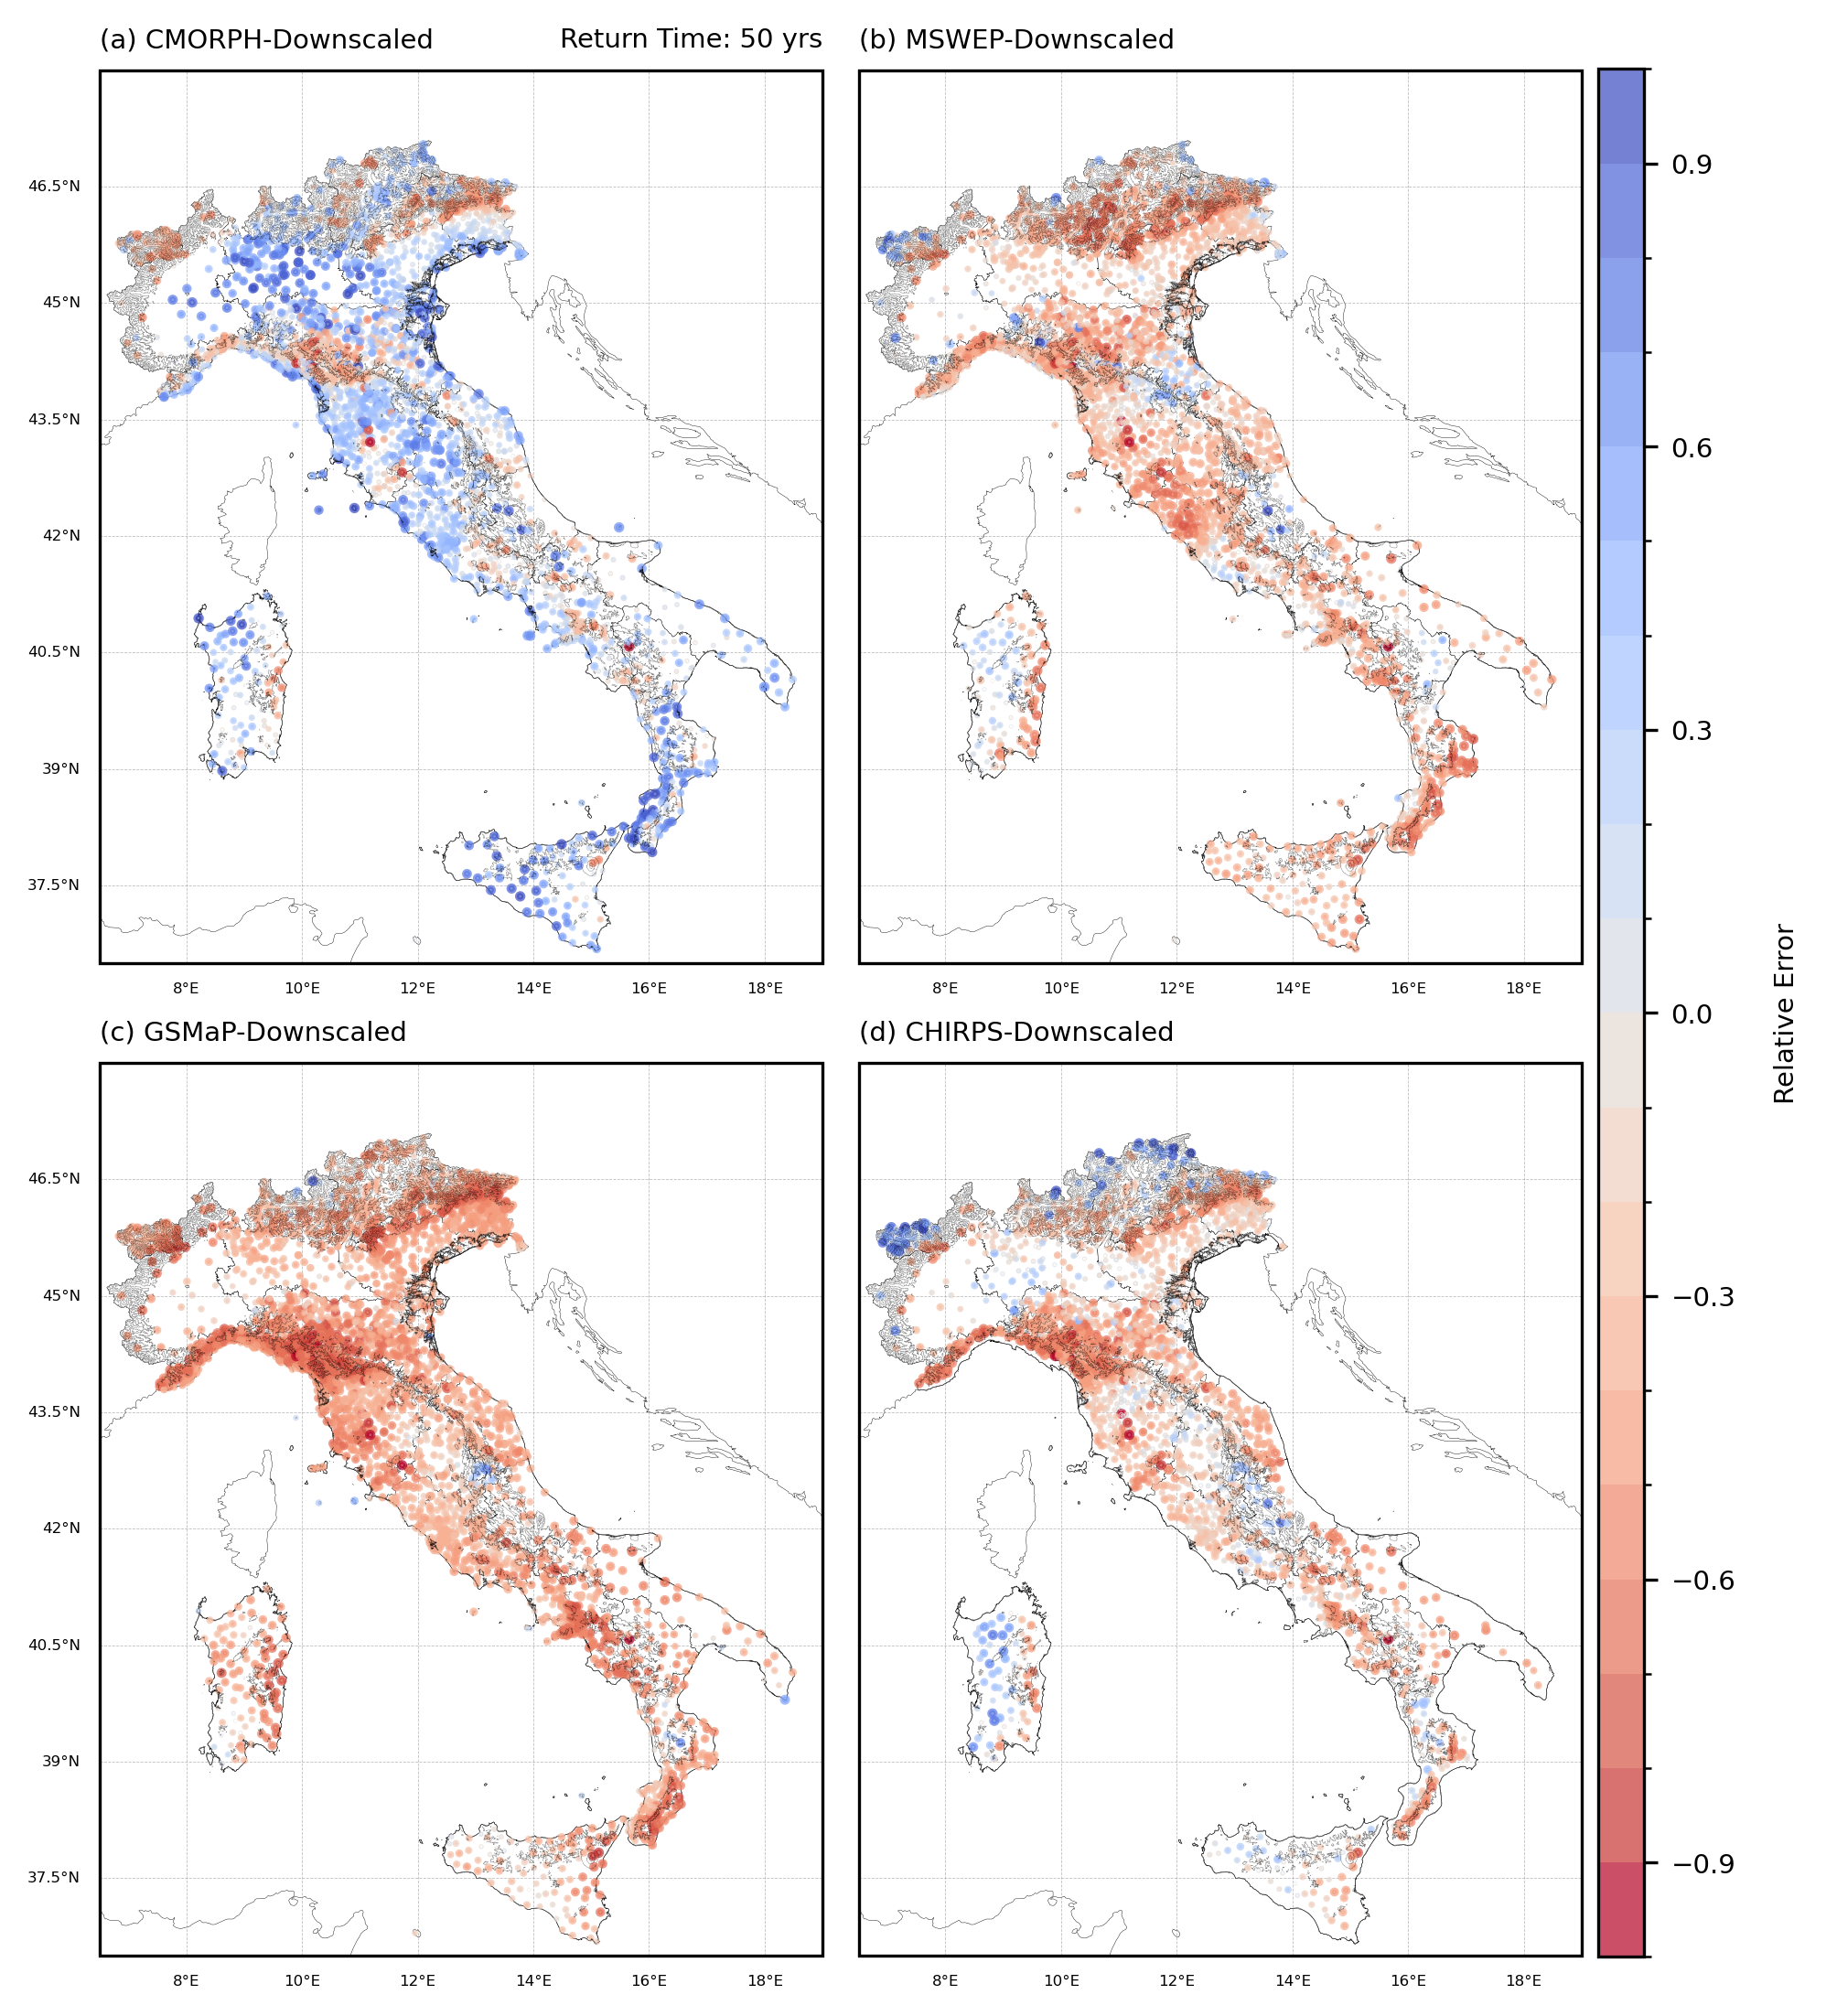

In [ ]:
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(6,8),dpi=300)
gs = gridspec.GridSpec(2,2)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.1,color='k')

im = REGIONS_merged.plot(legend=False, color='white', edgecolor="black", linewidth=0.1, ax=ax1)
DEM.plot(facecolor='None', edgecolor='k', ax=ax1, linewidth=0.1, zorder=21, alpha=0.5)
a1 = ax1.scatter(LON_CMORPH_ALL, LAT_CMORPH_ALL, c=RE_CMORPH_ALL, cmap='coolwarm_r', s=np.array(RE_CMORPH_ALL_NORM)*3, alpha=0.7, norm=norm, zorder=20)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels = True

gl.xlabel_style = {'size': 4, 'color': 'k'}
gl.ylabel_style = {'size': 4, 'color': 'k'}

# cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04)
# cbar.ax.tick_params(labelsize=6) 

ax1.set_title('(a) CMORPH-Downscaled', fontsize=7, loc='left')
ax1.set_title('Return Time: 50 yrs', fontsize=7, loc='right')

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.1,color='k')

im = REGIONS_merged.plot(legend=False, color='white', edgecolor="black", linewidth=0.1, ax=ax1)
DEM.plot(facecolor='None', edgecolor='k', ax=ax1, linewidth=0.1, zorder=21, alpha=0.5)
a1 = ax1.scatter(LON_MSWEP_ALL, LAT_MSWEP_ALL, c=RE_MSWEP_ALL, cmap='coolwarm_r', s=np.array(RE_MSWEP_ALL_NORM)*3, alpha=0.7, norm=norm, zorder=20)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels =False

gl.xlabel_style = {'size': 4, 'color': 'k'}
gl.ylabel_style = {'size': 4, 'color': 'k'}

# cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04)
# cbar.ax.tick_params(labelsize=6) 

ax1.set_title('(b) MSWEP-Downscaled', fontsize=7, loc='left')

# ============================================================================================================================
ax1 = plt.subplot(gs[1, 0], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.1,color='k')

im = REGIONS_merged.plot(legend=False, color='white', edgecolor="black", linewidth=0.1, ax=ax1)
DEM.plot(facecolor='None', edgecolor='k', ax=ax1, linewidth=0.1, zorder=21, alpha=0.5)
a1 = ax1.scatter(LON_GSMaP_ALL, LAT_GSMaP_ALL, c=RE_GSMaP_ALL, cmap='coolwarm_r', s=np.array(RE_GSMaP_ALL_NORM)*3, alpha=0.7, norm=norm, zorder=20)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels = True

gl.xlabel_style = {'size': 4, 'color': 'k'}
gl.ylabel_style = {'size': 4, 'color': 'k'}

# cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04)
# cbar.ax.tick_params(labelsize=6) 

ax1.set_title('(c) GSMaP-Downscaled', fontsize=7, loc='left')

# ============================================================================================================================
ax1 = plt.subplot(gs[1, 1], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.1,color='k')

im = REGIONS_merged.plot(legend=False, color='white', edgecolor="black", linewidth=0.1, ax=ax1)
DEM.plot(facecolor='None', edgecolor='k', ax=ax1, linewidth=0.1, zorder=21, alpha=0.5)
a1 = ax1.scatter(LON_CHIRPS_ALL, LAT_CHIRPS_ALL, c=RE_CHIRPS_ALL, cmap='coolwarm_r', s=np.array(RE_CHIRPS_ALL_NORM)*3, alpha=0.7, norm=norm, zorder=20)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels =False

gl.xlabel_style = {'size': 4, 'color': 'k'}
gl.ylabel_style = {'size': 4, 'color': 'k'}

# cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04)
# cbar.ax.tick_params(labelsize=6) 

ax1.set_title('(d) CHIRPS-Downscaled', fontsize=7, loc='left')

# ============================================================================================================================
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.05, hspace=0.01)

cbar_ax = fig.add_axes([0.96, 0.07, 0.028, 0.86])#0.96
cbar = fig.colorbar(a1, cax=cbar_ax, orientation='vertical')
cbar.ax.tick_params(labelsize=7)
cbar.set_label("Relative Error", fontsize=7, labelpad=10)  

salida = os.path.join('..','figures','Article_down','RE_MSWEP_CMORPH_GSMaP_CHIRPS.png')
print(f'Export figure to: {salida}')
plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.1, facecolor=None)

In [ ]:
# RE_IMERG_ALL_SAT = np.array(RE_IMERG_ALL_SAT)

In [ ]:
# plt.plot(RE_IMERG_ALL.flatten()-RE_IMERG_ALL_SAT.flatten())

ValueError: operands could not be broadcast together with shapes (2792,) (2803,) 